In [17]:
# Basic
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Modeling 
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Load the dataset

In [3]:
df = pd.read_csv('./data/StudentsPerformance.csv')

#### Show top 5 records

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Prepare X and Y variables

In [5]:
X = df.drop(columns=['math score'], axis=1)

In [6]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [10]:
y = df['math score']

In [12]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [11]:
print("Categories in 'gender variable: ", df['gender'].unique())
print("Categories in 'race/ethnicity' variable: ", df['race/ethnicity'].unique())
print("Categories in 'test preparation course' variable: ", df['test preparation course'].unique())
print("Categories in 'parental level of education' variable: ", df['parental level of education'].unique())

Categories in 'gender variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'test preparation course' variable:  ['none' 'completed']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [14]:
# Create column transformer with 3 types of transformers
numeric_features = X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include='object').columns

In [20]:
print('Numeric Features: ', numeric_features)
print('Categorical Features: ', categorical_features)

Numeric Features:  Index(['reading score', 'writing score'], dtype='object')
Categorical Features:  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [21]:
scaler = StandardScaler()
encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', encoder, categorical_features),
        ('StandardScaler', scaler, numeric_features)
    ]
)

In [22]:
X = preprocessor.fit_transform(X)

In [23]:
X.shape

(1000, 19)

#### Split into train and test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an evaluate function to give all metrics after model training

In [31]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_absolute_error(true, predicted))
    r2_sqaure = r2_score(true, predicted)
    return mae, rmse, r2_sqaure

In [32]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'XGBoost Regressor': XGBRegressor(),
    'Ada Boost Regressor': AdaBoostRegressor(),
    'Cat Boost Regressor': CatBoostRegressor(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}

In [41]:
models_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluation
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    # print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)

Learning rate set to 0.039525
0:	learn: 14.5987177	total: 1.16ms	remaining: 1.16s
1:	learn: 14.2251886	total: 2.89ms	remaining: 1.44s
2:	learn: 13.8866124	total: 4.61ms	remaining: 1.53s
3:	learn: 13.5235688	total: 5.7ms	remaining: 1.42s
4:	learn: 13.1887021	total: 6.88ms	remaining: 1.37s
5:	learn: 12.9124226	total: 7.93ms	remaining: 1.31s
6:	learn: 12.6000335	total: 8.85ms	remaining: 1.25s
7:	learn: 12.3299057	total: 9.88ms	remaining: 1.22s
8:	learn: 12.0660619	total: 10.9ms	remaining: 1.21s
9:	learn: 11.7730981	total: 12ms	remaining: 1.19s
10:	learn: 11.4922764	total: 13.1ms	remaining: 1.18s
11:	learn: 11.2626483	total: 14.3ms	remaining: 1.17s
12:	learn: 11.0426039	total: 15.3ms	remaining: 1.16s
13:	learn: 10.7991693	total: 16.5ms	remaining: 1.16s
14:	learn: 10.5541002	total: 18ms	remaining: 1.18s
15:	learn: 10.3191811	total: 19.7ms	remaining: 1.21s
16:	learn: 10.1000444	total: 21.2ms	remaining: 1.22s
17:	learn: 9.8945567	total: 22.5ms	remaining: 1.23s
18:	learn: 9.6901741	total: 23.7

In [42]:
pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

,Model Name,R2 Score
1,Ridge,0.880593
0,Linear Regression,0.879046
8,Random Forest Regressor,0.853579
5,Cat Boost Regressor,0.851632
4,Ada Boost Regressor,0.850296
2,Lasso,0.825320
3,XGBoost Regressor,0.821589
6,K-Neighbors Regressor,0.783813
7,Decision Tree Regressor,0.740094


#### Select Best Model

In [48]:
model = Lasso(fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print('Accuracy of the model is %.2f'%score)

Accuracy of the model is 82.53


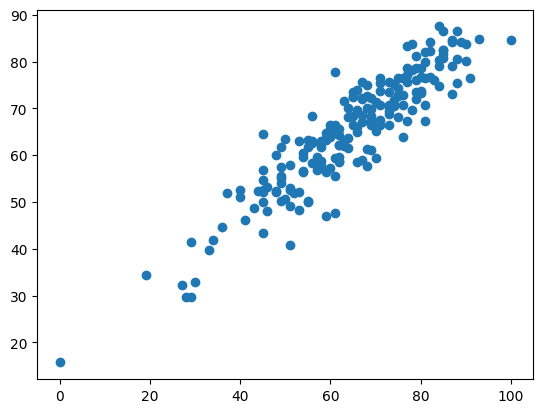

In [49]:
plt.scatter(y_test, y_pred)

<Axes: xlabel='math score'>

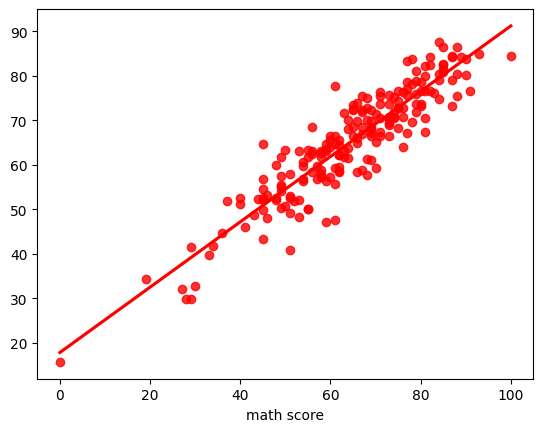

In [50]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

#### Difference Between Actual and Predicted Values

In [51]:
pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': (y_test-y_pred)})

,Actual Value,Predicted Value,Difference
521,91,76.485660,14.514340
737,53,63.009858,-10.009858
740,80,73.675752,6.324248
660,74,75.237667,-1.237667
411,84,80.373144,3.626856
...,...,...,...
408,52,51.974759,0.025241
332,62,58.491434,3.508566
208,74,70.465888,3.534112
613,65,68.472296,-3.472296
